## [Aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(sum(map(ord,"aesthetics")))

In [4]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,8):
        plt.plot(x,np.sin(x+i*0.5)*(8-i)*flip)

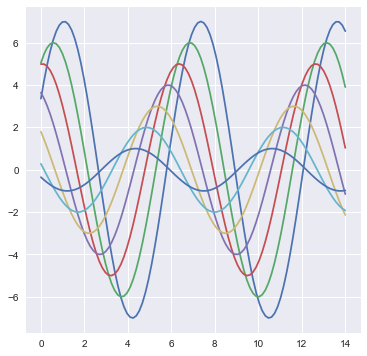

In [125]:
sinplot() # matplotlib version XD

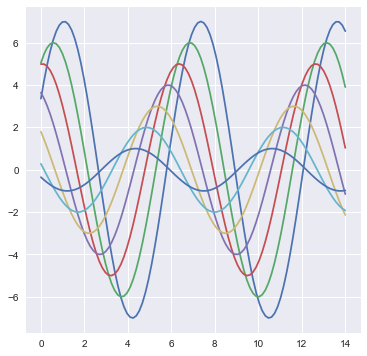

In [126]:
sns.set()
sinplot() # use the 'seaborn' style

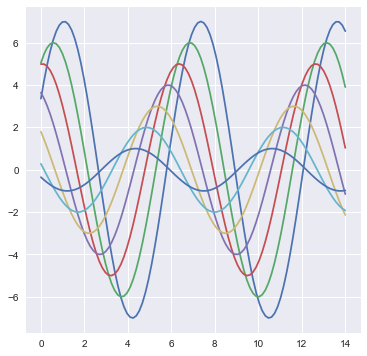

In [127]:
sinplot()
sns.despine() # remove the axes spines :)

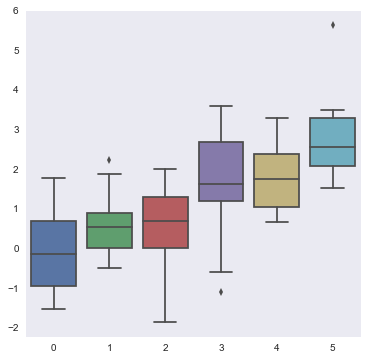

In [128]:
# or " with sns.axes_style(...): "
sns.set_style("dark") 

data = np.random.normal(size=(20,6))+np.arange(6)/2 # DO NOT comment this line
sns.boxplot(data=data)

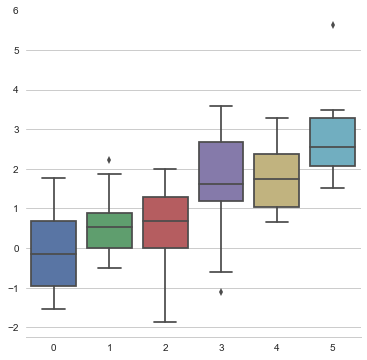

In [129]:
with sns.axes_style("whitegrid"):
    sns.boxplot(data=data,palette="deep")
    sns.despine(left=True)

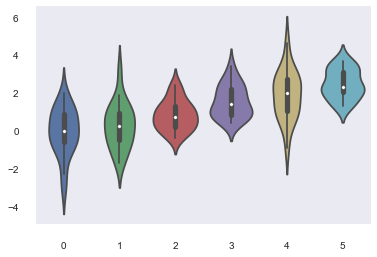

In [39]:
with sns.axes_style("dark"):
    f, ax = plt.subplots()
    sns.violinplot(data=data)
    sns.despine(offset=10,trim=True)

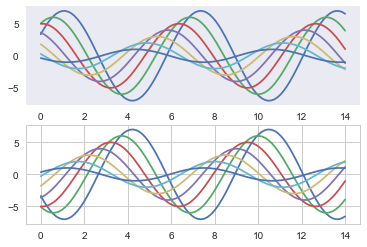

In [43]:
with sns.axes_style("dark"):
    plt.subplot(211)
    sinplot()

plt.subplot(212)
sinplot(-1)

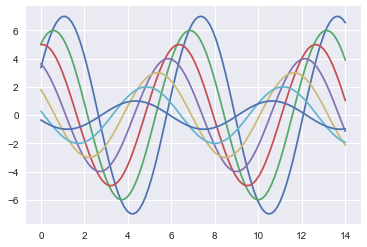

In [50]:
# check all of them (which you can configure with)
# >> sns.axes_style()

with sns.axes_style("darkgrid",{"axesl.facecolor":"1.9"}):
    sinplot()

In [51]:
sns.set()  # back to default!

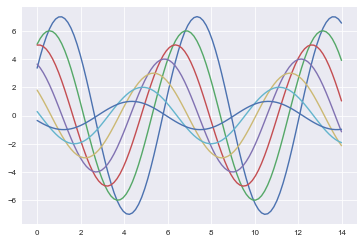

In [55]:
# Note the differences among them!

sns.set_context("paper")
sinplot()

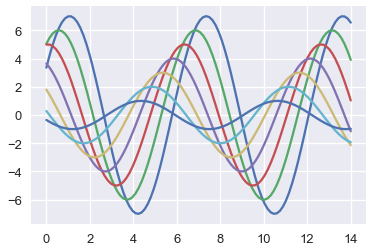

In [58]:
sns.set_context("talk")
sinplot()

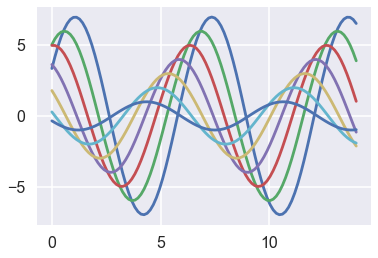

In [60]:
sns.set_context("poster")
sinplot()

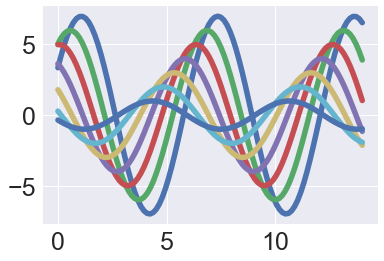

In [64]:
sns.set_context("notebook",font_scale=2.5,rc={"lines.linewidth":5.5})
sinplot()

# [Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [65]:
%matplotlib inline

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
sns.set(rc={"figure.figsize":(6,6)})

# map(..) equals `[ ord(i) for i in "palettes" ]`
np.random.seed(sum(map(ord,"palettes")))

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

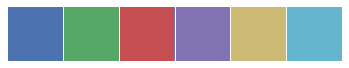

In [87]:
current_palette = sns.color_palette()

# deep, muted, pastel, bright, dark, colorblind
current_palette
sns.palplot(current_palette)

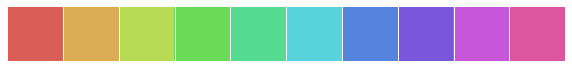

In [92]:
# simple transformation of RGB values 
sns.palplot(sns.color_palette("hls",10))

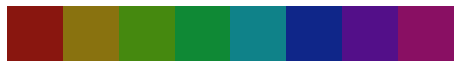

In [130]:
# l: lightness  s: saturation
sns.palplot(sns.hls_palette(8, l=0.3, s=0.8))

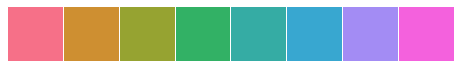

In [96]:
# make the "brightness" and "saturationn" more uniformly (for human eyes)
sns.palplot(sns.color_palette("husl",8))

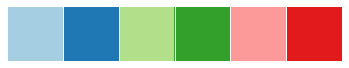

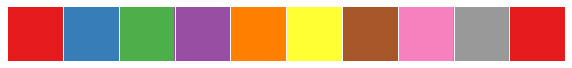

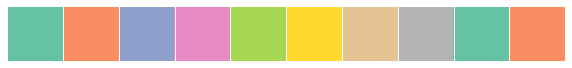

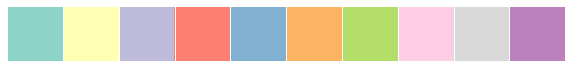

In [109]:
# Hmm..
sns.palplot(sns.color_palette("Paired"))
sns.palplot(sns.color_palette("Set1",10))
sns.palplot(sns.color_palette("Set2",10))
sns.palplot(sns.color_palette("Set3",10))

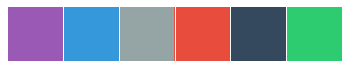

In [110]:
# certain colors
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### named RGB colors (by xkcd)

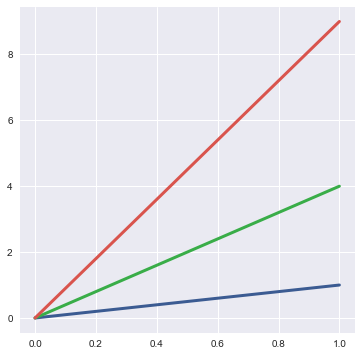

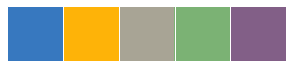

In [118]:
# named random RGB colors (by xkcd)
plt.plot([0,1],[0,1],sns.xkcd_rgb["denim blue"],lw=3)
plt.plot([0,1],[0,4],sns.xkcd_rgb["medium green"],lw=3)
plt.plot([0,1],[0,9],sns.xkcd_rgb["pale red"],lw=3)

# or pulling out single colors from that (xkcd_rgb)
colors = ["windows blue","amber","greyish","faded green","dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

### sequential color palettes

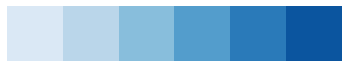

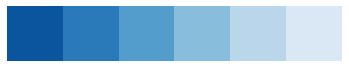

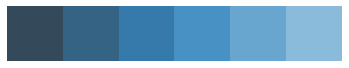

In [131]:
# For this kind of data, it'll bring
#   subtile shift in hue,
#   large shift in brightness and saturation

# Thus it'll naturall 
#   draw the eye to the relatively important parts of the data

# normal / reversed / dark
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("Blues_r"))
sns.palplot(sns.color_palette("Blues_d"))

### sequential *"cubehelix"* palettes

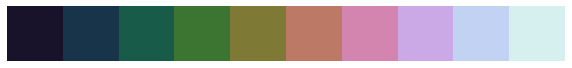

In [141]:
# matplotlib default
#   *with a linear increase or decrease* in **brightness** 
#   and **some variation in hue**.

sns.palplot(sns.color_palette("cubehelix",10))

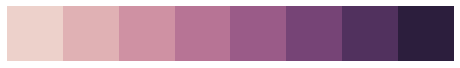

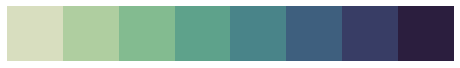

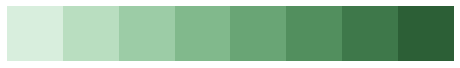

In [152]:
# seaborn func

sns.palplot(sns.cubehelix_palette(8))
sns.palplot(sns.cubehelix_palette(8,start=0.5,rot=-0.76))

sns.palplot(sns.cubehelix_palette(8,start=2,rot=0,dark=0.9,light=0.3,reverse=True))

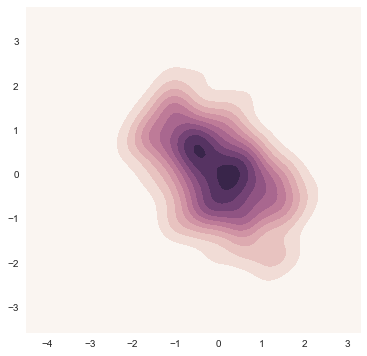

In [153]:
x,y = np.random.multivariate_normal([0,0],[[1,-0.5],[-0.5,1]],size=300).T

cmap = sns.cubehelix_palette(light=1,as_cmap=True)
sns.kdeplot(x,y,cmap=cmap,shade=True)

### custom sequential palettes

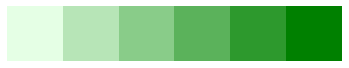

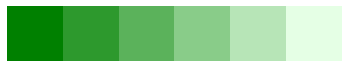

In [166]:
sns.palplot(sns.light_palette("green"))
sns.palplot(sns.light_palette("green",reverse=True))

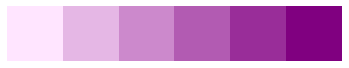

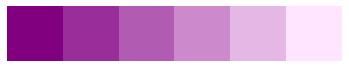

In [167]:
sns.palplot(sns.light_palette("purple"))
sns.palplot(sns.light_palette("purple",reverse=True))

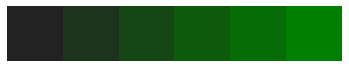

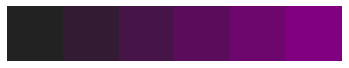

In [168]:
sns.palplot(sns.dark_palette("green"))
sns.palplot(sns.dark_palette("purple"))

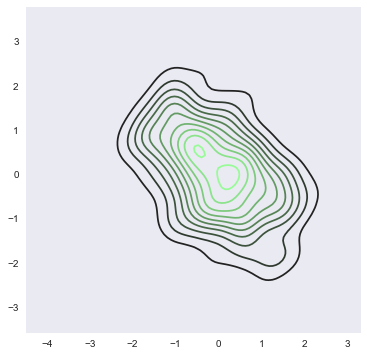

In [171]:
pal = sns.dark_palette("palegreen",as_cmap=True)
sns.kdeplot(x,y,cmap=pal)

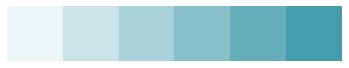

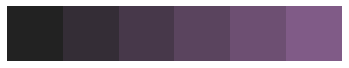

In [175]:
# input 
sns.palplot(sns.light_palette((210,80,60),input="husl"))
sns.palplot(sns.dark_palette("muted purple",input="xkcd"))

### diverging color palettes

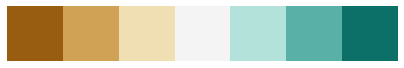

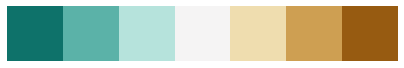

In [182]:
sns.palplot(sns.color_palette("BrBG",7))
sns.palplot(sns.color_palette("BrBG_r",7))

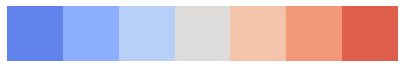

In [184]:
# less contrast between the middle values and the extremes
sns.palplot(sns.color_palette("coolwarm",7))

### custom diverging palettes

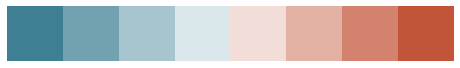

In [189]:
sns.palplot(sns.diverging_palette(220,20,n=8))

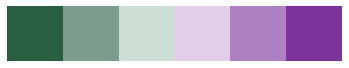

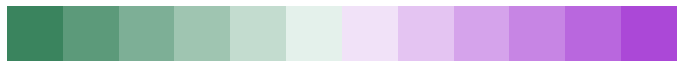

In [192]:
sns.palplot(sns.diverging_palette(145,290,s=73,l=36,n=6))
sns.palplot(sns.diverging_palette(145,290,sep=10,n=12))

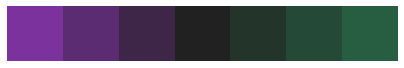

In [197]:
sns.palplot(sns.diverging_palette(290,145,l=36,n=7,center="dark"))

### setting the default color palette

In [205]:
def cosplot(flip=1):
    x = np.linspace(0,20,160)
    for i in range(1,7):
        plt.plot(x,np.cos(x+i*0.5)*(7-i)*flip)

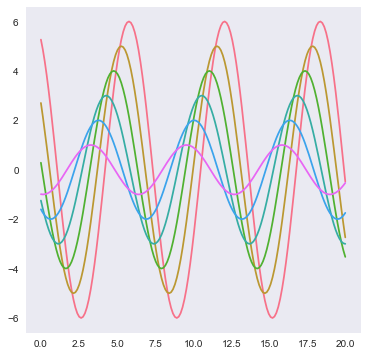

In [206]:
sns.set_palette("husl")
cosplot()

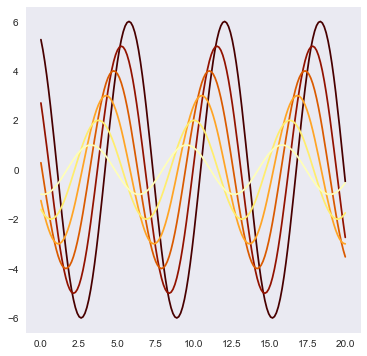

In [209]:
with sns.color_palette("afmhot"):
    cosplot()